In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Function to load data
def load_data(file_path):
    print("Loading data...")
    
    # Try to infer the separator
    try:
        with open(file_path, 'r') as f:
            first_line = f.readline()
        
        if '\t' in first_line:
            sep = '\t'
        elif ',' in first_line:
            sep = ','
        elif ';' in first_line:
            sep = ';'
        else:
            sep = None  # Let pandas try to figure it out
            
        df = pd.read_csv(file_path, sep=sep)
    except:
        df = pd.read_csv(file_path)
    
    print(f"Loaded dataset with shape: {df.shape}")
    return df

# Function to preprocess data
def preprocess_data(df):
    print("Preprocessing data...")
    
    # Display dataset info
    print(f"Dataset columns: {df.columns.tolist()}")
    print(f"First few rows:\n{df.head()}")
    print(f"Data types:\n{df.dtypes}")

    # Convert object-type columns to numeric if possible
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                print(f"Converted column {col} to numeric")
            except:
                print(f"Could not convert column {col} to numeric")
    
    # Remove constant columns
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    if constant_cols:
        df = df.drop(columns=constant_cols)
        print(f"Removed {len(constant_cols)} constant columns: {constant_cols}")
    
    # Check if 'label' column exists, if not assume last column is the target
    if 'label' not in df.columns:
        print("Warning: 'label' column not found. Assuming last column as target.")
        df = df.rename(columns={df.columns[-1]: 'label'})
    
    # Convert label to categorical if needed
    if df['label'].dtype == 'object':
        print("Converting label to numerical format...")
        df['label'] = df['label'].astype('category').cat.codes
    
    # Separate features and target
    X = df.drop(columns=['label'])
    y = df['label']
    
    print(f"Label distribution: {y.value_counts().to_dict()}")
    
    # Check correlation and remove highly correlated features
    numeric_X = X.select_dtypes(include=['number'])
    
    if numeric_X.shape[1] > 0:
        print("Checking feature correlations...")
        correlation_matrix = numeric_X.corr().abs()
        upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
        
        # Remove highly correlated features
        if high_corr_features:
            X = X.drop(columns=high_corr_features)
            print(f"Removed {len(high_corr_features)} highly correlated features: {high_corr_features}")
    else:
        print("No numeric features for correlation analysis")
    
    return X, y

# Load dataset
file_path = "C:\\Users\\tejuc\\Desktop\\Guidewire-Team-kaizen\\src\\preprocessed_dataset.csv"
df = load_data(file_path)

# Preprocess data
X, y = preprocess_data(df)

# Combine processed features and label
processed_df = pd.concat([X, y], axis=1)

# Save preprocessed data to CSV for later use
processed_file_path = "processed_dataset.csv"
processed_df.to_csv(processed_file_path, index=False)
print(f"Preprocessed dataset saved as '{processed_file_path}'")

# Display the first few rows of the processed dataset
processed_df.head()


Loading data...
Loaded dataset with shape: (50459, 167)
Preprocessing data...
Dataset columns: ['timestamp', 'duration', 'total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min', 'payload_bytes_mean', 'payload_bytes_variance', 'payload_bytes_median', 'payload_bytes_skewness', 'payload_bytes_cov', 'payload_bytes_mode', 'fwd_payload_bytes_variance', 'fwd_payload_bytes_median', 'fwd_payload_bytes_skewness', 'fwd_payload_bytes_cov', 'fwd_payload_bytes_mode', 'bwd_payload_bytes_median', 'bwd_payload_bytes_skewness', 'bwd_payload_bytes_mode', 'total_header_bytes', 'max_header_bytes', 'min_header_bytes', 'mean_header_bytes', 'std_header_bytes', 'median_header_bytes', 'skewness_header_bytes', 'fwd_max_header_bytes', 'fwd_std_header_bytes', 'fwd_skewness_header_bytes', 'bwd_max_header_bytes', 'bwd_min_header_bytes', 'bwd_std_header_bytes', 'bwd_skewness_header_bytes', 'fwd_segment_size_mean', 'fwd_segment_size_min', 'fwd_segment_size_cov', 'fwd_segment_size_mode', 'bwd_segment_size_mean'

,timestamp,duration,total_payload_bytes,payload_bytes_max,payload_bytes_min,payload_bytes_mean,payload_bytes_variance,payload_bytes_median,payload_bytes_skewness,payload_bytes_cov,...,container_cpu_cfs_throttled_periods_rate,container_cpu_system_seconds_rate,container_cpu_usage_seconds_rate,container_cpu_user_seconds_rate,container_file_descriptors,container_last_seen,container_memory_failures_rate,container_network_receive_bytes_rate,container_network_transmit_bytes_rate,label
0,0,2.379301,0.553722,1.163479,-0.074272,2.138192,0.323919,3.035915,-0.787843,-1.738692,...,-0.064877,-0.946102,-0.693526,-0.326620,-0.588583,-2.672491,-0.168480,-1.335388,-1.146545,-0.944824
1,1,3.324408,0.548509,1.161820,-0.074272,2.120360,0.324633,2.907680,-0.762960,-1.717768,...,-0.064877,-0.944234,-0.692877,-0.327314,-0.588583,-2.669630,-0.170883,-1.317323,-1.136028,-0.944824
2,2,2.475718,1.408162,1.161820,-0.074272,2.481217,0.333865,3.035915,-1.136401,-2.028500,...,-0.064877,-0.997286,-0.796310,-0.466081,-0.588583,-2.670703,-0.257363,-1.324098,-1.139972,-0.944824
3,3,2.557511,1.760667,1.163479,-0.074272,2.605520,0.334690,3.035915,-1.134571,-2.125424,...,-0.064877,-0.997286,-0.796310,-0.466081,-0.588583,-2.670703,-0.257363,-1.324098,-1.139972,-0.944824
4,4,1.769615,0.553504,1.163479,-0.074272,2.362892,0.331470,3.057288,-0.955078,-1.933260,...,-0.064877,-0.946102,-0.693526,-0.326620,-0.588583,-2.672491,-0.168480,-1.335388,-1.146545,-0.944824


In [2]:
print("Shape of preprocessed dataset:", processed_df.shape)


Shape of preprocessed dataset: (50459, 167)


In [3]:
print("Missing values per column:\n", processed_df.isnull().sum())


Missing values per column:
 timestamp                                0
duration                                 0
total_payload_bytes                      0
payload_bytes_max                        0
payload_bytes_min                        0
                                        ..
container_last_seen                      0
container_memory_failures_rate           0
container_network_receive_bytes_rate     0
container_network_transmit_bytes_rate    0
label                                    0
Length: 167, dtype: int64


In [4]:
print("Number of duplicate rows:", processed_df.duplicated().sum())


Number of duplicate rows: 0


In [5]:
processed_df = processed_df.drop_duplicates()
print("Shape after removing duplicates:", processed_df.shape)


Shape after removing duplicates: (50459, 167)


In [6]:
print("Number of duplicate rows:", processed_df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
print("Label distribution:\n", processed_df['label'].value_counts())


Label distribution:
 label
-0.944824    22877
 1.378552    14861
-0.170365     8448
 0.604093     4273
Name: count, dtype: int64


In [8]:
print(processed_df['label'].dtype)


float64


In [9]:
print(processed_df.dtypes)


timestamp                                  int64
duration                                 float64
total_payload_bytes                      float64
payload_bytes_max                        float64
payload_bytes_min                        float64
                                          ...   
container_last_seen                      float64
container_memory_failures_rate           float64
container_network_receive_bytes_rate     float64
container_network_transmit_bytes_rate    float64
label                                    float64
Length: 167, dtype: object


In [10]:
print(processed_df.describe())


          timestamp      duration  total_payload_bytes  payload_bytes_max  \
count  50459.000000  50459.000000         50459.000000       50459.000000   
mean   24979.013873      0.000277             0.000150           0.000296   
std    14449.486812      1.000267             1.000309           1.000258   
min        0.000000     -0.436525            -0.237298          -0.467297   
25%    12529.000000     -0.436525            -0.237298          -0.467297   
50%    24893.000000     -0.436064            -0.234909          -0.449049   
75%    37494.500000     -0.428873            -0.097208           0.285879   
max    50100.000000      3.554193            79.021891          26.749912   

       payload_bytes_min  payload_bytes_mean  payload_bytes_variance  \
count       50459.000000        50459.000000            50459.000000   
mean            0.000047            0.000359                0.000087   
std             1.000325            1.000225                1.000321   
min            -0.

In [11]:
print("Shape of preprocessed dataset:", processed_df.shape)


Shape of preprocessed dataset: (50459, 167)


In [12]:
processed_df.to_csv("C:\\Users\\tejuc\\Desktop\\Guidewire-Team-kaizen\\src\\preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved successfully!")


Preprocessed dataset saved successfully!


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

def load_and_explore_data(file_path):
    """Load and explore the Excel dataset"""
    print("Loading Excel dataset...")
    #the file is actually csv but in xls format
    df = pd.read_csv(file_path)

    print(f"Dataset shape: {df.shape}")
    print("\nPreview of the data:")
    print(df.head())
    
    print("\nMissing values per column:")
    print(df.isnull().sum())
    
    return df



In [14]:
# 2. Preprocessing the Data
def preprocess_data(processed_df):
    """Preprocess the dataset"""
    print("\nPreprocessing data...")
    
    # For numeric columns, fill with median
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    
    print("Creating synthetic labels for demonstration (replace with actual labels)...")
    
    high_cpu = df.filter(like='cpu').apply(lambda x: x > x.quantile(0.95), axis=0).any(axis=1)
    high_memory = df.filter(like='memory').apply(lambda x: x > x.quantile(0.95), axis=0).any(axis=1)
    high_network = df.filter(like='bytes').apply(lambda x: x > x.quantile(0.95), axis=0).any(axis=1)
    
    df['issue_label'] = (high_cpu & high_memory) | (high_memory & high_network) | (high_cpu & high_network)
    df['issue_label'] = df['issue_label'].astype(int)
    
    print(f"Created labels with {df['issue_label'].sum()} potential issues identified")
    
    return df

# 3. Feature Engineering
def engineer_features(df):
    """Create new features that might be useful for prediction"""
    print("\nEngineering features...")

    # Ratios between related metrics
    if 'mean_header_bytes' in df.columns and 'std_header_bytes' in df.columns:
        df['header_bytes_ratio'] = df['mean_header_bytes'] / (df['std_header_bytes'] + 1)  # +1 to avoid division by zero
    
    # Aggregate features
    packet_cols = df.filter(like='packet').columns
    df['total_packet_activity'] = df[packet_cols].sum(axis=1)
    
    byte_cols = df.filter(like='bytes').columns
    df['total_byte_activity'] = df[byte_cols].sum(axis=1)
    
    #Polynomial features for important metrics
    if 'container_cpu_cfs_periods_rate' in df.columns:
        df['cpu_squared'] = df['container_cpu_cfs_periods_rate'] ** 2
    
    if 'container_memory_failures_rate' in df.columns:
        df['memory_squared'] = df['container_memory_failures_rate'] ** 2
    
    # Log transforming the skewed features
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].skew() > 1 and (df[col] > 0).all():
            df[f'{col}_log'] = np.log1p(df[col])
    
    return df

# 4. Split Data into train and test
def split_data(df):
    """Split data into training and testing sets"""
    print("\nSplitting data into training and testing sets...")
    
    X = df.drop(['issue_label'], axis=1)
    y = df['issue_label']
    
    X = X.select_dtypes(include=['number'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test



In [15]:
# 5. Building and Training our Model
def build_and_train_model(X_train, y_train):
    """Build and train the predictive model"""
    print("\nBuilding and training model...")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    
    pipeline.fit(X_train, y_train)
    
    print("Model training completed")
    
    return pipeline

# 6. Evaluating the Model
def evaluate_model(model, X_test, y_test):
    """Evaluate the model performance"""
    print("\nEvaluating model performance...")
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return accuracy

# 7. Build Anomaly Detection Model
def build_anomaly_detection(X_train):
    """Build an anomaly detection model for unsupervised detection"""
    print("\nBuilding anomaly detection model...")
    
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    iso_forest.fit(X_train)
    
    print("Anomaly detection model training completed")
    
    return iso_forest

# 8. Saving Models
def save_models(classifier_model, anomaly_model, feature_names):
    """Save trained models to disk"""
    print("\nSaving models to disk...")
    
    joblib.dump(classifier_model, 'kubernetes_classifier_model.pkl')
    
    joblib.dump(anomaly_model, 'kubernetes_anomaly_model.pkl')
    
    joblib.dump(feature_names, 'model_feature_names.pkl')
    
    print("Models saved successfully")

# 9. Using Model for Prediction
def predict_issues(new_data, classifier_model=None, anomaly_model=None, feature_names=None):
    """Use the trained models to predict issues on new data"""
    if classifier_model is None:
        # Loading the saved models
        classifier_model = joblib.load('kubernetes_classifier_model.pkl')
        anomaly_model = joblib.load('kubernetes_anomaly_model.pkl')
        feature_names = joblib.load('model_feature_names.pkl')
    
    new_data = new_data[feature_names]
    
    classifier_predictions = classifier_model.predict(new_data)
    classifier_proba = classifier_model.predict_proba(new_data)[:, 1]
    
    
    # -1 for anomalies, 1 for normal points
    anomaly_predictions = anomaly_model.predict(new_data)
    anomaly_scores = anomaly_model.decision_function(new_data)
    
    # Convert anomaly predictions to binary (1 for anomaly, 0 for normal)
    anomaly_binary = np.where(anomaly_predictions == -1, 1, 0)
    
    # Combining predictions (if either model predicts an issue, marking it as an issue)
    combined_predictions = np.logical_or(classifier_predictions, anomaly_binary).astype(int)
    
    results = pd.DataFrame({
        'classifier_prediction': classifier_predictions,
        'classifier_probability': classifier_proba,
        'anomaly_detected': anomaly_binary,
        'anomaly_score': anomaly_scores,
        'combined_prediction': combined_predictions
    })
    
    return results



Loading Excel dataset...
Dataset shape: (50459, 167)

Preview of the data:
   timestamp  duration  total_payload_bytes  payload_bytes_max  \
0          0  2.379301             0.553722           1.163479   
1          1  3.324408             0.548509           1.161820   
2          2  2.475718             1.408162           1.161820   
3          3  2.557511             1.760667           1.163479   
4          4  1.769615             0.553504           1.163479   

   payload_bytes_min  payload_bytes_mean  payload_bytes_variance  \
0          -0.074272            2.138192                0.323919   
1          -0.074272            2.120360                0.324633   
2          -0.074272            2.481217                0.333865   
3          -0.074272            2.605520                0.334690   
4          -0.074272            2.362892                0.331470   

   payload_bytes_median  payload_bytes_skewness  payload_bytes_cov  ...  \
0              3.035915               -0.787

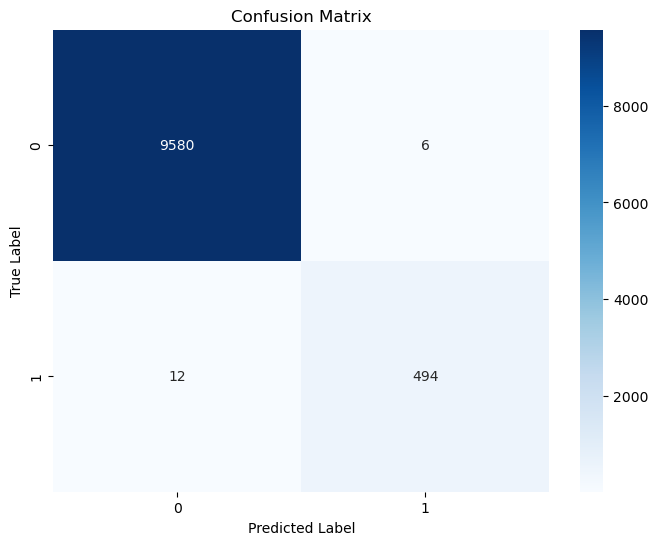


Building anomaly detection model...
Anomaly detection model training completed

Saving models to disk...
Models saved successfully

Example prediction on test data:
   classifier_prediction  classifier_probability  anomaly_detected  \
0                      0                    0.02                 0   
1                      0                    0.00                 0   
2                      0                    0.00                 0   
3                      0                    0.00                 0   
4                      0                    0.00                 0   

   anomaly_score  combined_prediction  
0       0.124799                    0  
1       0.157233                    0  
2       0.118765                    0  
3       0.152340                    0  
4       0.030663                    0  

Process completed successfully!


In [16]:
# 10. Main Function
def main():
    """Main function to execute the end-to-end process"""
    file_path = "C:\\Users\\tejuc\\Desktop\\Guidewire-Team-kaizen\\src\\preprocessed_dataset.csv"
    df = load_and_explore_data(file_path)
    
    processed_df = preprocess_data(df)
    
    featured_df = engineer_features(processed_df)
    
    X_train, X_test, y_train, y_test = split_data(featured_df)
    
    classifier_model = build_and_train_model(X_train, y_train)
    
    evaluate_model(classifier_model, X_test, y_test)
    
    anomaly_model = build_anomaly_detection(X_train)
    
    feature_names = X_train.columns.tolist()
    save_models(classifier_model, anomaly_model, feature_names)
    
    print("\nExample prediction on test data:")
    sample_size = min(5, len(X_test))
    sample_data = X_test.iloc[:sample_size]
    predictions = predict_issues(sample_data, classifier_model, anomaly_model, feature_names)
    print(predictions)
    
    print("\nProcess completed successfully!")

# Execute the main function
if __name__ == "__main__":
    main()


Loading and evaluating saved models...
No saved metrics found. Run evaluation to generate metrics.


Enter path to dataset for evaluation (or press Enter to skip):  C:\\Users\\tejuc\\Desktop\\Guidewire-Team-kaizen\\src\\preprocessed_dataset.csv


Loading dataset...
Preprocessing data for evaluation...

Performing extended model evaluation...
Accuracy on test set: 0.9846

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9586
           1       0.99      0.70      0.82       506

    accuracy                           0.98     10092
   macro avg       0.99      0.85      0.91     10092
weighted avg       0.98      0.98      0.98     10092



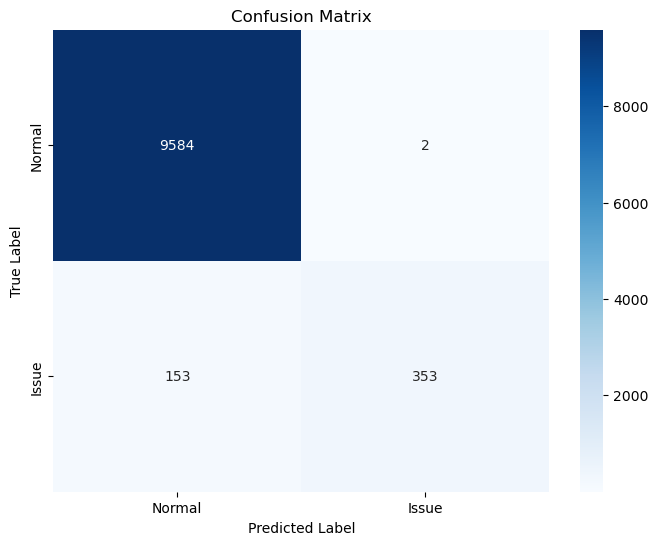


Plotting learning curves...


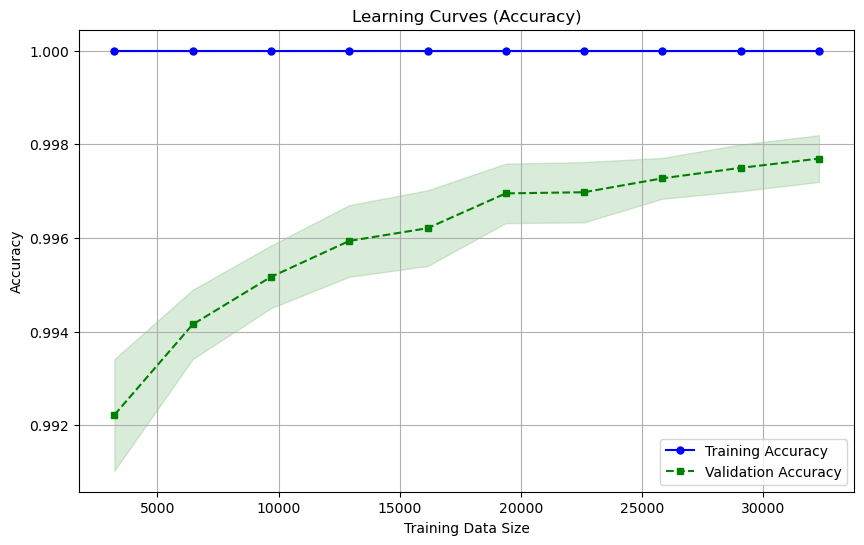


Calculating cross-validation metrics...
Cross-validation Accuracy: 0.9977 ± 0.0004
Cross-validation Log Loss: 0.0103 ± -0.0004


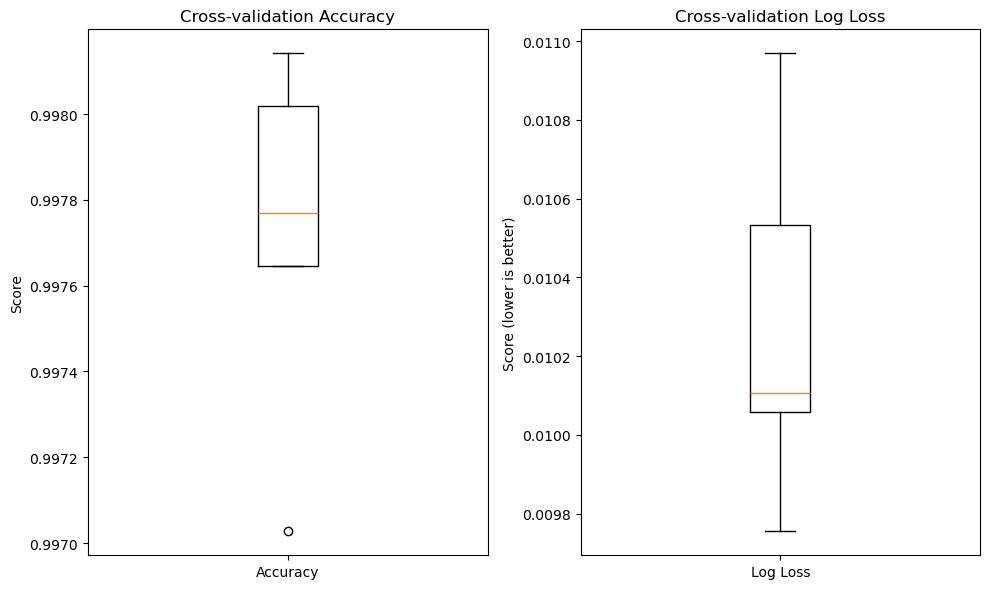


Plotting ROC and Precision-Recall curves...


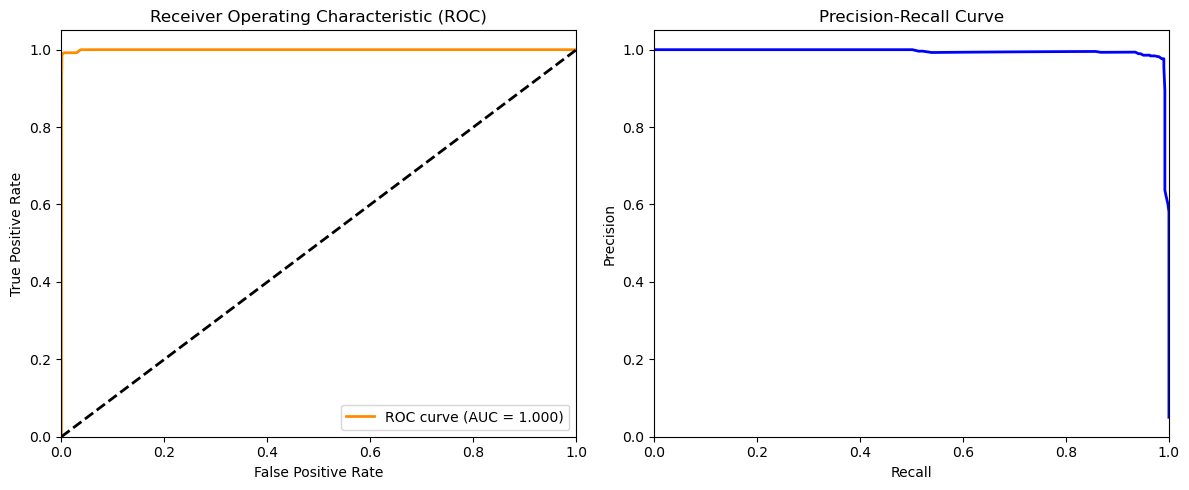


Model metrics saved to 'model_performance_metrics.pkl'

Sample predictions:
   classifier_prediction  classifier_probability  anomaly_detected  \
0                      0                    0.02                 0   
1                      0                    0.06                 0   
2                      0                    0.02                 0   
3                      0                    0.02                 0   
4                      0                    0.00                 0   

   anomaly_score  combined_prediction  
0       0.135601                    0  
1       0.155068                    0  
2       0.123490                    0  
3       0.151230                    0  
4       0.028264                    0  


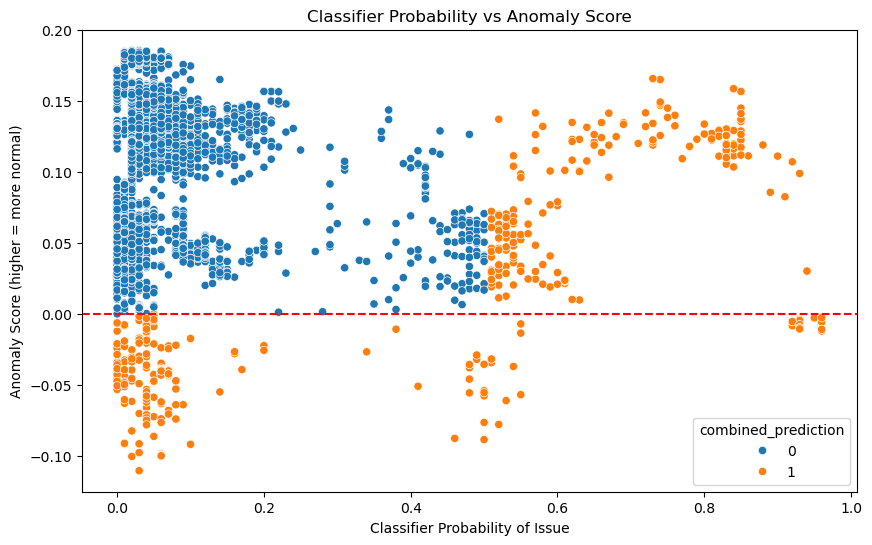


Number of disagreements between classifier and anomaly detector: 576
Percentage of disagreements: 5.71%

Sample of disagreements:
    classifier_prediction  classifier_probability  anomaly_detected  \
23                      1                    0.53                 0   
50                      1                    0.51                 0   
75                      1                    0.74                 0   
79                      0                    0.06                 1   
83                      0                    0.04                 1   

    anomaly_score  combined_prediction  
23       0.044981                    1  
50       0.031191                    1  
75       0.164985                    1  
79      -0.100306                    1  
83      -0.020480                    1  


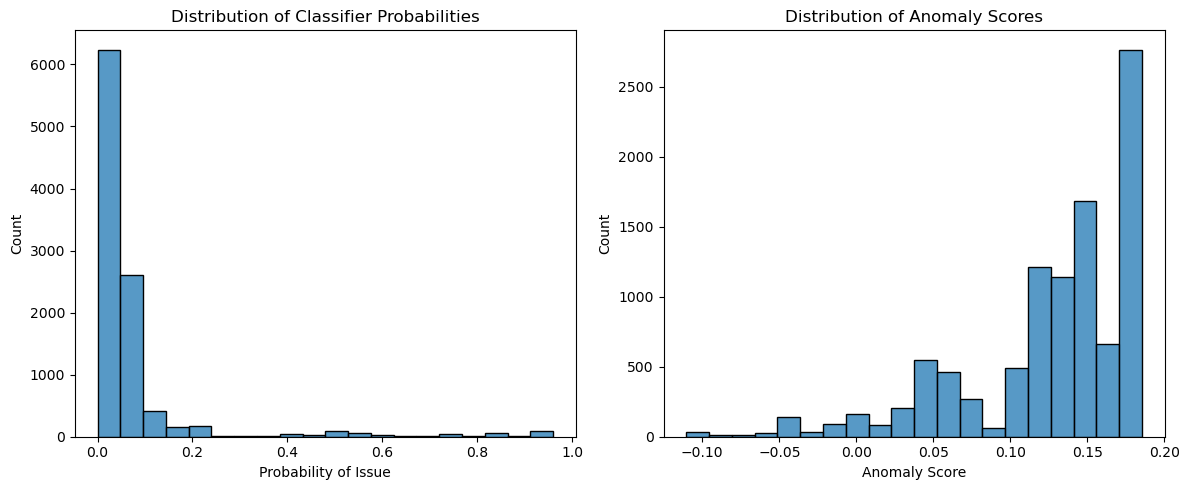

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')


def predict_issues(new_data, classifier_model=None, anomaly_model=None, feature_names=None):
    """Use the trained models to predict issues on new data"""
    if classifier_model is None:
        # Load the saved models
        classifier_model = joblib.load('kubernetes_classifier_model.pkl')
        anomaly_model = joblib.load('kubernetes_anomaly_model.pkl')
        feature_names = joblib.load('model_feature_names.pkl')
    
   
    new_data = new_data[feature_names]
    
    
    classifier_predictions = classifier_model.predict(new_data)
    classifier_proba = classifier_model.predict_proba(new_data)[:, 1]
    
    
    # -1 for anomalies, 1 for normal points
    anomaly_predictions = anomaly_model.predict(new_data)
    anomaly_scores = anomaly_model.decision_function(new_data)
    
    # Convert anomaly predictions to binary (1 for anomaly, 0 for normal)
    anomaly_binary = np.where(anomaly_predictions == -1, 1, 0)
    
   
    combined_predictions = np.logical_or(classifier_predictions, anomaly_binary).astype(int)
    
   
    results = pd.DataFrame({
        'classifier_prediction': classifier_predictions,
        'classifier_probability': classifier_proba,
        'anomaly_detected': anomaly_binary,
        'anomaly_score': anomaly_scores,
        'combined_prediction': combined_predictions
    })
    
    return results

def plot_learning_curves(model, X_train, y_train, cv=5):
    """Plot learning curves to show training and validation metrics"""
    print("\nPlotting learning curves...")
    
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, 
        train_sizes=train_sizes, cv=cv, 
        scoring='accuracy', n_jobs=-1
    )
    
    # mean and std for training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, 
             label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, 
                     alpha=0.15, color='blue')
    
    plt.plot(train_sizes, val_mean, color='green', marker='s', markersize=5, 
             linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, 
                     alpha=0.15, color='green')
    
    plt.title('Learning Curves (Accuracy)')
    plt.xlabel('Training Data Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig('learning_curves_accuracy.png')
    plt.show()
    
    return train_mean, val_mean

def calculate_cross_val_metrics(model, X_train, y_train, cv=5):
    """Calculate cross-validation accuracy and loss metrics"""
    print("\nCalculating cross-validation metrics...")
    
    # Cross-validation for accuracy
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Cross-validation for log loss
    # custom scorer for log loss
    def log_loss_scorer(estimator, X, y):
        try:
            y_pred_proba = estimator.predict_proba(X)
            return -log_loss(y, y_pred_proba)
        except:
            # If model doesn't support predict_proba, use predict
            y_pred = estimator.predict(X)
            # Convert to binary matrix for log_loss
            y_pred_binary = np.zeros((len(y), 2))
            y_pred_binary[np.arange(len(y)), y_pred] = 1
            return -log_loss(y, y_pred_binary)
    
    cv_loss = cross_val_score(model, X_train, y_train, cv=cv, scoring=log_loss_scorer)
    
    
    print(f"Cross-validation Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
    print(f"Cross-validation Log Loss: {-cv_loss.mean():.4f} ± {-cv_loss.std():.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(cv_accuracy)
    plt.title('Cross-validation Accuracy')
    plt.xticks([1], ['Accuracy'])
    plt.ylabel('Score')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(-cv_loss)
    plt.title('Cross-validation Log Loss')
    plt.xticks([1], ['Log Loss'])
    plt.ylabel('Score (lower is better)')
    
    plt.tight_layout()
    plt.savefig('cross_validation_metrics.png')
    plt.show()
    
    return cv_accuracy, -cv_loss

def plot_roc_and_pr_curves(model, X_test, y_test):
    """Plot ROC and Precision-Recall curves for model evaluation"""
    print("\nPlotting ROC and Precision-Recall curves...")
    
    y_pred = model.predict(X_test)
    
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # precision-recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        
        # ROC curve
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        
        # PR curve
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, color='blue', lw=2)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        
        plt.tight_layout()
        plt.savefig('roc_pr_curves.png')
        plt.show()
    except:
        print("Model doesn't support probability predictions, skipping ROC and PR curves.")

def evaluate_model_extended(model, X_train, X_test, y_train, y_test, cv=5):
    """Extended model evaluation with multiple metrics and visualizations"""
    print("\nPerforming extended model evaluation...")
    
   
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # classification report
    print(f"Accuracy on test set: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Issue'], 
                yticklabels=['Normal', 'Issue'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    # learning curves
    train_acc_curve, val_acc_curve = plot_learning_curves(model, X_train, y_train, cv=cv)
    
    # cross-validation metrics
    cv_accuracy, cv_loss = calculate_cross_val_metrics(model, X_train, y_train, cv=cv)
    
    # ROC and PR curves
    plot_roc_and_pr_curves(model, X_test, y_test)
    
    
    if hasattr(model, 'feature_importances_'):
        
        if isinstance(model, Pipeline):
            if hasattr(model.named_steps['classifier'], 'feature_importances_'):
                importances = model.named_steps['classifier'].feature_importances_
                feature_names = X_train.columns
            else:
                importances = None
                feature_names = None
        else:
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                feature_names = X_train.columns
            else:
                importances = None
                feature_names = None
        
        if importances is not None and feature_names is not None:
            
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)
            
            
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
            plt.title('Top 20 Feature Importances')
            plt.tight_layout()
            plt.savefig('feature_importances.png')
            plt.show()
            
            print("\nTop 10 Feature Importances:")
            print(feature_importance_df.head(10))
    
   
    metrics = {
        'test_accuracy': accuracy,
        'cross_val_accuracy_mean': cv_accuracy.mean(),
        'cross_val_accuracy_std': cv_accuracy.std(),
        'cross_val_loss_mean': cv_loss.mean(),
        'cross_val_loss_std': cv_loss.std(),
        'learning_curve_final_train_acc': train_acc_curve[-1],
        'learning_curve_final_val_acc': val_acc_curve[-1]
    }
    
    
    joblib.dump(metrics, 'model_performance_metrics.pkl')
    print("\nModel metrics saved to 'model_performance_metrics.pkl'")
    
    return metrics

def load_and_evaluate_saved_model():
    """Load saved models and evaluate them"""
    print("\nLoading and evaluating saved models...")
    
    try:
       
        classifier_model = joblib.load('kubernetes_classifier_model.pkl')
        anomaly_model = joblib.load('kubernetes_anomaly_model.pkl')
        feature_names = joblib.load('model_feature_names.pkl')
        
        
        try:
            metrics = joblib.load('model_performance_metrics.pkl')
            print("\nLoaded model performance metrics:")
            for key, value in metrics.items():
                print(f"{key}: {value}")
        except:
            print("No saved metrics found. Run evaluation to generate metrics.")
        
      
        data_path = input("Enter path to dataset for evaluation (or press Enter to skip): ")
        if data_path:
            
            print("Loading dataset...")
            df = pd.read_csv(data_path)
            
            print("Preprocessing data for evaluation...")
            numeric_cols = df.select_dtypes(include=['number']).columns
            df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
            
            high_cpu = df.filter(like='cpu').apply(lambda x: x > x.quantile(0.95), axis=0).any(axis=1)
            high_memory = df.filter(like='memory').apply(lambda x: x > x.quantile(0.95), axis=0).any(axis=1)
            high_network = df.filter(like='bytes').apply(lambda x: x > x.quantile(0.95), axis=0).any(axis=1)
            
            df['issue_label'] = (high_cpu & high_memory) | (high_memory & high_network) | (high_cpu & high_network)
            df['issue_label'] = df['issue_label'].astype(int)
            
            X = df.drop(['issue_label'], axis=1)
            y = df['issue_label']
            
            X = X.select_dtypes(include=['number'])
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            X_train = X_train.reindex(columns=feature_names, fill_value=0)
            X_test = X_test.reindex(columns=feature_names, fill_value=0)
            
            evaluate_model_extended(classifier_model, X_train, X_test, y_train, y_test)
            
            sample_size = min(5, len(X_test))
            sample_data = X_test.iloc[:sample_size]
            predictions = predict_issues(sample_data, classifier_model, anomaly_model, feature_names)
            print("\nSample predictions:")
            print(predictions.head())
            
            plt.figure(figsize=(10, 6))
            
            # scatterplot of anomaly scores vs classifier probabilities
            sns.scatterplot(
                x='classifier_probability', 
                y='anomaly_score', 
                hue='combined_prediction',
                data=predict_issues(X_test, classifier_model, anomaly_model, feature_names)
            )
            
            plt.title('Classifier Probability vs Anomaly Score')
            plt.xlabel('Classifier Probability of Issue')
            plt.ylabel('Anomaly Score (higher = more normal)')
            plt.axhline(y=0, color='r', linestyle='--')
            plt.savefig('classifier_vs_anomaly.png')
            plt.show()
            
#model disagreements if any
            predictions_full = predict_issues(X_test, classifier_model, anomaly_model, feature_names)
            disagreements = predictions_full[
                predictions_full['classifier_prediction'] != predictions_full['anomaly_detected']
            ]
            
            print(f"\nNumber of disagreements between classifier and anomaly detector: {len(disagreements)}")
            print(f"Percentage of disagreements: {len(disagreements) / len(predictions_full) * 100:.2f}%")
            
            if len(disagreements) > 0:
                print("\nSample of disagreements:")
                print(disagreements.head())
                
                # Plot distribution of disagreements
                plt.figure(figsize=(12, 5))
                
                plt.subplot(1, 2, 1)
                sns.histplot(predictions_full['classifier_probability'], bins=20)
                plt.title('Distribution of Classifier Probabilities')
                plt.xlabel('Probability of Issue')
                
                plt.subplot(1, 2, 2)
                sns.histplot(predictions_full['anomaly_score'], bins=20)
                plt.title('Distribution of Anomaly Scores')
                plt.xlabel('Anomaly Score')
                
                plt.tight_layout()
                plt.savefig('prediction_distributions.png')
                plt.show()
                
        else:
            print("Skipping evaluation on new data.")
            
    except Exception as e:
        print(f"Error loading or evaluating models: {e}")
        print("Make sure the models have been trained and saved before running this function.")

if __name__ == "__main__":
    load_and_evaluate_saved_model()